# 4 -- Evaluating & tuning machine learning classifiers

In [1]:
%load_ext watermark

In [2]:
%watermark -a "Sebastian Raschka" -p numpy,scikit-learn

Author: Sebastian Raschka

numpy       : 1.23.5
scikit-learn: 1.2.2



## Pipelines

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3)
)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=123)

In [5]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [6]:
pipe.predict(X_test)[:10]

array([2, 2, 2, 1, 0, 1, 1, 0, 0, 1])

In [7]:
pipe.score(X_test, y_test)

0.92

## K-fold cross-validation

In [8]:
from sklearn.model_selection import StratifiedKFold

In [9]:
cval = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [10]:
for i, (train, test) in enumerate(cval.split(X_train, y_train)):
    print(f"Iter: {i} | Test idx: {test}")

Iter: 0 | Test idx: [ 7 10 17 18 29 30 31 34 43 48 51 52 53 58 71]
Iter: 1 | Test idx: [ 0  9 12 22 25 40 42 45 49 54 57 60 63 66 73]
Iter: 2 | Test idx: [ 5  6 11 13 15 20 32 36 37 38 44 56 65 67 72]
Iter: 3 | Test idx: [21 23 24 26 27 33 39 47 55 59 61 62 64 68 70]
Iter: 4 | Test idx: [ 1  2  3  4  8 14 16 19 28 35 41 46 50 69 74]


In [11]:
import numpy as np

all_acc = []

for i, (train, test) in enumerate(cval.split(X_train, y_train)):
    pipe.fit(X_train[train], y_train[train])
    all_acc.append(pipe.score(X_train[test], y_train[test]))
    
np.mean(all_acc)

0.9199999999999999

In [12]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(pipe, X=X_train, y=y_train, cv=5)
scores.mean()

0.9066666666666666

In [13]:
scores = cross_val_score(pipe, X=X_train, y=y_train, cv=cval)
scores.mean()

0.9199999999999999

In [14]:
scores = cross_val_score(
    pipe, X=X_train, y=y_train, cv=cval, scoring="f1_macro"
)
scores.mean()

0.922991082991083

## Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

cmat = confusion_matrix(y_test, y_pred)

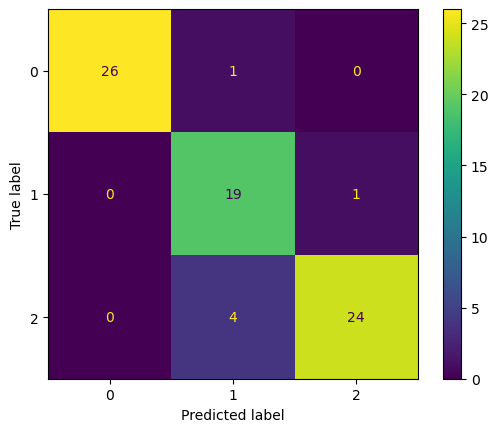

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot();

## Randomized search

In [17]:
from sklearn.model_selection import ParameterSampler 
from scipy.stats import loguniform


distributions = {
    "learning_rate": loguniform(0.001, 0.1), 
    "activation": ['relu', 'swish', 'gelu']
}               

sampler = ParameterSampler(distributions, n_iter=10, random_state=123)

In [18]:
for param in sampler:
    print("my_script.py", end="")
    
    for k in param:
        print(f' --{k} {param [k]}', end="")
    
    print()

my_script.py --activation gelu --learning_rate 0.02666309997212923
my_script.py --activation gelu --learning_rate 0.00284251592929916
my_script.py --activation gelu --learning_rate 0.027434725570656345
my_script.py --activation gelu --learning_rate 0.007017992831138442
my_script.py --activation gelu --learning_rate 0.0066351194450833505
my_script.py --activation swish --learning_rate 0.009159332036121721
my_script.py --activation swish --learning_rate 0.006339209625904185
my_script.py --activation relu --learning_rate 0.028714378103928375
my_script.py --activation gelu --learning_rate 0.0013163027639428407
my_script.py --activation relu --learning_rate 0.015410076665458067


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
model = MLPClassifier()
pipe = make_pipeline(sc, model)

In [ ]:
param_distributions = ???

rcv = RandomizedSearchCV(pipe, param_distributions, n_iter=100, cv=5, random_state=123, verbose=2)

In [ ]:
# Inherits the same methods we used previously:

rcv.fit(X_train, y_train)
rcv.score(X_test, y_test)
rcv.predict(X_test, y_test)